In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

df = pd.read_csv('TED_Preprocessed.csv')

df = df[df['views'] < 100000]

del df['video_link']
del df['date_month_year']

df.head()

,duration,title,views,likes,comments,date,month,year,day
0,10,The Future Will Be Shaped by Optimists | Kevin...,51273,1900,262,21,4,2022,Thu
1,9,An Olympic Champion’s Unwavering Advocacy for ...,25597,355,53,20,4,2022,Wed
2,7,The African Swamp Protecting Earth's Environme...,21430,633,40,20,4,2022,Wed
5,7,Ukraine's Fight to Keep Educating Its Children...,38252,1200,225,14,4,2022,Thu
6,8,Why Entrepreneurship Flourishes in The Country...,32369,449,95,14,4,2022,Thu


#### 1. Finding Correlation from Scratch

In [2]:
factor = []

for i in df.values:    
    factor.append(round(i[4]/i[2],5))          # i[2] = Views, i[4] = Comments
    
df['view_to_comments'] = factor

df.head()

,duration,title,views,likes,comments,date,month,year,day,view_to_comments
0,10,The Future Will Be Shaped by Optimists | Kevin...,51273,1900,262,21,4,2022,Thu,0.00511
1,9,An Olympic Champion’s Unwavering Advocacy for ...,25597,355,53,20,4,2022,Wed,0.00207
2,7,The African Swamp Protecting Earth's Environme...,21430,633,40,20,4,2022,Wed,0.00187
5,7,Ukraine's Fight to Keep Educating Its Children...,38252,1200,225,14,4,2022,Thu,0.00588
6,8,Why Entrepreneurship Flourishes in The Country...,32369,449,95,14,4,2022,Thu,0.00293


In [3]:
print("Minimum : ", min(df['view_to_comments']))
print("Maximum : ", max(df['view_to_comments']))

print(df['view_to_comments'].mode())

Minimum :  0.00013
Maximum :  0.05427
0    0.00137
dtype: float64


#### 2. Adding Predicted Comments Column

In [4]:
comments = []

for i in df['views']:
    comments.append(int(i * .00137))
    
df['pred_comments'] = comments

df.head()

,duration,title,views,likes,comments,date,month,year,day,view_to_comments,pred_comments
0,10,The Future Will Be Shaped by Optimists | Kevin...,51273,1900,262,21,4,2022,Thu,0.00511,70
1,9,An Olympic Champion’s Unwavering Advocacy for ...,25597,355,53,20,4,2022,Wed,0.00207,35
2,7,The African Swamp Protecting Earth's Environme...,21430,633,40,20,4,2022,Wed,0.00187,29
5,7,Ukraine's Fight to Keep Educating Its Children...,38252,1200,225,14,4,2022,Thu,0.00588,52
6,8,Why Entrepreneurship Flourishes in The Country...,32369,449,95,14,4,2022,Thu,0.00293,44


## Ploting Correlation

#### 3. Correlation b/w Comments and Views

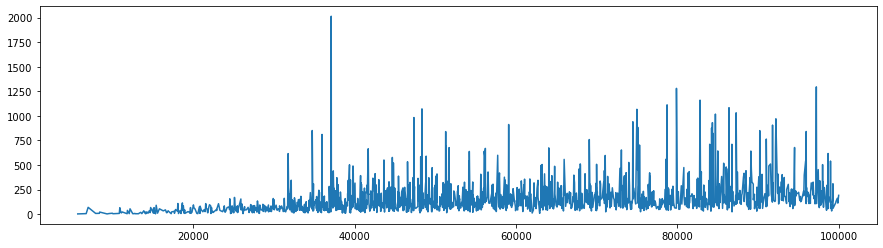

In [27]:
data = []

for i in df.values:
    data.append([i[2],i[4]])
    
df_ = pd.DataFrame(data, columns = ['views','comments'])

views = list(df_.sort_values(by = 'views')['views'])
comments = list(df_.sort_values(by = 'views')['comments'])

fig, ax = plt.subplots(figsize = (15,4))

ax.plot(views,comments)


plt.show()

In [28]:
df.head()

,duration,title,views,likes,comments,date,month,year,day,view_to_comments,pred_comments,pred_likes
0,10,The Future Will Be Shaped by Optimists | Kevin...,51273,1900,262,21,4,2022,Thu,0.00511,103,103
1,9,An Olympic Champion’s Unwavering Advocacy for ...,25597,355,53,20,4,2022,Wed,0.00207,51,51
2,7,The African Swamp Protecting Earth's Environme...,21430,633,40,20,4,2022,Wed,0.00187,43,43
5,7,Ukraine's Fight to Keep Educating Its Children...,38252,1200,225,14,4,2022,Thu,0.00588,77,77
6,8,Why Entrepreneurship Flourishes in The Country...,32369,449,95,14,4,2022,Thu,0.00293,65,65


#### 4. Correlation b/w Views & [Comments, Predicted Comments]

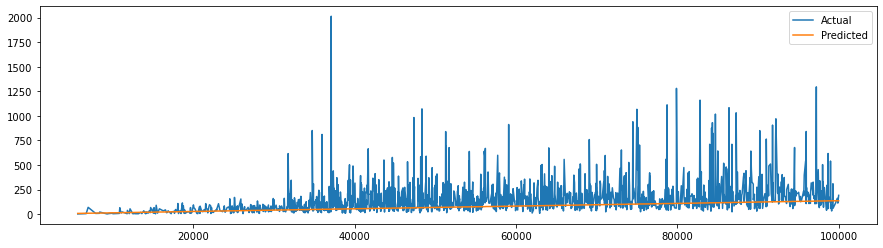

In [8]:
data = []

for i in df.values:
    
    data.append([i[2],i[4],i[10]])

    
df_ = pd.DataFrame(data, columns = ['views','comments','pred_comments'])

views  = list(df_.sort_values(by = 'views')['views'])
likes  = list(df_.sort_values(by = 'views')['comments'])
likes_ = list(df_.sort_values(by = 'views')['pred_comments'])

fig, ax = plt.subplots(figsize = (15,4))

plt.plot(views,likes , label = 'Actual')
plt.plot(views,likes_, label = 'Predicted')

plt.legend()

plt.show()

In [9]:
df.head()

,duration,title,views,likes,comments,date,month,year,day,view_to_comments,pred_comments
0,10,The Future Will Be Shaped by Optimists | Kevin...,51273,1900,262,21,4,2022,Thu,0.00511,70
1,9,An Olympic Champion’s Unwavering Advocacy for ...,25597,355,53,20,4,2022,Wed,0.00207,35
2,7,The African Swamp Protecting Earth's Environme...,21430,633,40,20,4,2022,Wed,0.00187,29
5,7,Ukraine's Fight to Keep Educating Its Children...,38252,1200,225,14,4,2022,Thu,0.00588,52
6,8,Why Entrepreneurship Flourishes in The Country...,32369,449,95,14,4,2022,Thu,0.00293,44


## 5. Finding Loss Using MSE

#### 5.1) Finding M-Error

In [10]:
total_error = []

for i in df.values:
    
    t = i[4]-i[10]      # i[4] is Actual Comments, i[10] is Predicted Comments
    
    if (t >= 0):
        total_error.append(t)
    else:
        total_error.append(-t)
        
sum(total_error)/len(total_error)


92.08843537414965

#### 5.2) Finding View to Comments Ratio

In [12]:
view_to_comments = []

for i in df.values:    
    view_to_comments.append(round(i[4]/i[2],5))
    
df['view_to_comments'] = view_to_comments

st  = int(df['view_to_comments'].min() * 100000)
end = int(df['view_to_comments'].max() * 100000)

factors = []

for i in range(st,end + 1 , 1):
    factors.append(i/100000)

#### 5.3) Predicting Comments for Specific Factor

In [46]:
comments_ = []

for i in df['views']: 
    comments_.append(int(i * .01388))

### 6. Combining Factor + Error + Ratios

In [29]:
comments = np.array(df['comments'])

error = []

for i in tqdm(range(st,end + 1 , 1)):        # Creating Start and Ending Reage for Factors
    factor = i/100000                       
    
    comments_ = []
    
    for i in df['views']:                    # Predicting Likes for Specific Factor     
        comments_.append(int(factor * i))

    comments_ = np.array(comments_) 
    
    total_error = []                         
    
    for i in range(len(comments)):              # Erros for Actual Like to Predicted Like for One Factor
        l = comments[i] - comments_[i]
        if (l >= 0):                         # Finding Modulo
            total_error.append(l)
        else:
            total_error.append(-l)
    
    total_error = np.array(total_error)    
    
    error.append([factor, int(total_error.mean())])     # Finding Error for Specific Factor
    
error = pd.DataFrame(error, columns = ['Factor','Error'])

100%|██████████████████████████████████████| 5416/5416 [00:07<00:00, 770.16it/s]


#### Finding Best Factor that Fits the Likes and Views

In [30]:
final_factor = error.sort_values(by = 'Error').head(10)['Factor'].mean()

In [31]:
final_factor

0.0020150000000000003

In [32]:
comments_ = []

for i in df['views']:
    comments_.append(int(i * final_factor))
    
df['pred_comments'] = comments_

df.head()

,duration,title,views,likes,comments,date,month,year,day,view_to_comments,pred_comments,pred_likes
0,10,The Future Will Be Shaped by Optimists | Kevin...,51273,1900,262,21,4,2022,Thu,0.00511,103,103
1,9,An Olympic Champion’s Unwavering Advocacy for ...,25597,355,53,20,4,2022,Wed,0.00207,51,51
2,7,The African Swamp Protecting Earth's Environme...,21430,633,40,20,4,2022,Wed,0.00187,43,43
5,7,Ukraine's Fight to Keep Educating Its Children...,38252,1200,225,14,4,2022,Thu,0.00588,77,77
6,8,Why Entrepreneurship Flourishes in The Country...,32369,449,95,14,4,2022,Thu,0.00293,65,65


### Actual to Predicted Likes with best Fit Factor

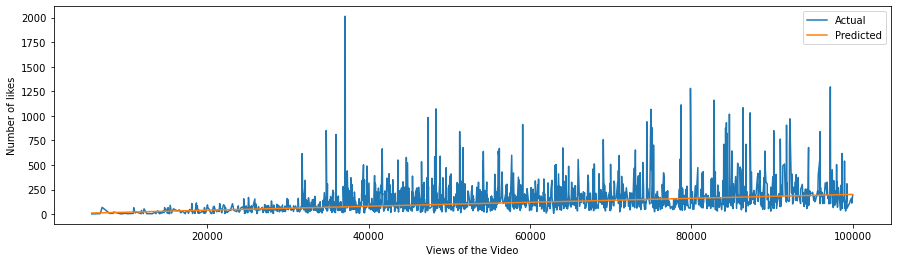

In [33]:
data = []

for i in df.values:
    
    data.append([i[2],i[4],i[10]])

    
df_ = pd.DataFrame(data, columns = ['views','comments','pred_comments'])

views  = list(df_.sort_values(by = 'views')['views'])
likes  = list(df_.sort_values(by = 'views')['comments'])
likes_ = list(df_.sort_values(by = 'views')['pred_comments'])

fig, ax = plt.subplots(figsize = (15,4))

plt.plot(views,likes , label = 'Actual')
plt.plot(views,likes_, label = 'Predicted')

plt.legend()

plt.xlabel('Views of the Video')
plt.ylabel('Number of likes')

plt.show()